# Project 3 - Artificial Neural Networks

In this project, you will work with a custom flower species dataset and a car object detection dataset. You will implement artificial neural networks for classification and object detection tasks with ```TensorFlow``` implementations.

The goal of this assignment include:

1. Set up datasets in format needed to run ```TensorFlow``` objects
2. Implement artificial neural networks with ```TensorFlow```
3. Carry out experiments to select best ANN hyperparameters
4. Implement best training practices with ```TensorFlow```, including checkpoints, early stopping, adaptive learning rate
5. Experiment with transfer learning using ```TensorFlow```
6. Implement qualitative and quantitative performance measures
7. Report observations, propose business-centric solutions and propose mitigating strategies

## Deliverables

As part of this project, you should deliver the following materials:

1. [**4-page IEEE-format paper**](https://www.ieee.org/conferences/publishing/templates.html). Write a paper with no more than 4 pages addressing the questions posed below. When writing this report, consider a business-oriented person as your reader (e.g. your PhD advisor, your internship manager, etc.). Tell *the story* for each datasets' goal and propose solutions by addressing (at least) the questions posed below.

2. **Python Code**. Create two separate Notebooks: (1) "training.ipynb" used for training and hyperparameter tuning, (2) "test.ipynb" for evaluating the final trained model in the test set. The "test.ipynb" should load all trained objects and simply evaluate the performance. So don't forget to **push the trained models** to your repository to allow us to run it.

All of your code should run without any errors and be well-documented. 

3. **README.md file**. Edit the readme.md file in your repository and how to use your code. If there are user-defined parameters, your readme.md file must clearly indicate so and demonstrate how to use your code. **Consider the case where the user wants to utilize your code to run on a different test set. Indicate in your readme.md file how this can be achieved.**

This is an **individual assignment**. 

These deliverables are **due Wednesday, December 6 @ 11:59pm**. Late submissions will not be accepted, so please plan accordingly.

---

# Dataset 1: Flower Species Dataset

The training dataset is saved as a ```numpy``` array and contains a total of 1678 images from 10 classes. Each RBG image is of size $300\times 300 \times 3$. The 10 classes and its label encodings are:

| Flower Species | Roses | Magnolias | Lilies | Sunflowers | Orchids | Marigold | Hibiscus | Firebush | Pentas | Bougainvillea |
| ---------     | ------| ----------| -------| -----------| --------| ---------| ---------| ---------| -------| --------------|
| Label          |  0    |    1      |    2   |    3       |    4    |    5     |   6      |   7      |   8    |       9       |

In [1]:
class_names = ['Roses', 'Magnolias', 'Lilies', 'Sunflowers', 'Orchids', 
               'Marigold', 'Hibiscus', 'Firebush', 'Pentas', 'Bougainvillea']

The goal is to utilize the training images to train a flower species classifier (an artificial neural network architecture), and make predictions for the test set.

Let's visualize the dataset:

In [2]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Loading Training Data
X_train = np.load('flower_species_classification/data_train.npy').T
t_train = np.load('flower_species_classification/labels_train.npy')

print(X_train.shape, t_train.shape)

(1658, 270000) (1658,)


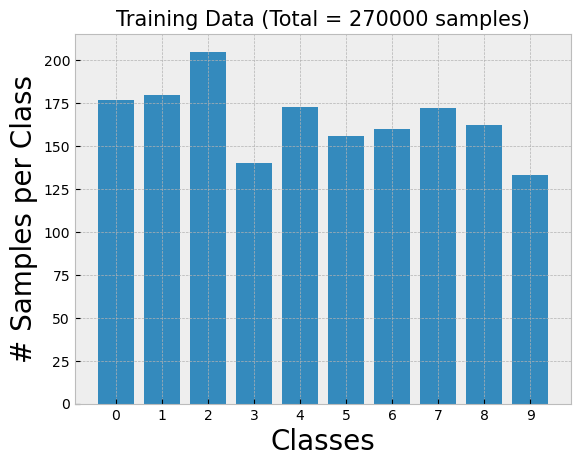

In [3]:
# Counting number samples per class
vals, counts = np.unique(t_train, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(10),range(10))
plt.xlabel('Classes',size=20)
plt.ylabel('# Samples per Class', size=20)
plt.title('Training Data (Total = '+str(X_train.shape[1])+' samples)',size=15);

In [ ]:
# Displaying some random examples per class

for i in range(0,10):
    rnd_sample = npr.permutation(np.where(t_train==i)[0])
    fig=plt.figure(figsize=(15,15))
    for j in range(25):
        fig.add_subplot(5,5,j+1)
        plt.imshow(X_train[rnd_sample[j],:].reshape((300,300,3)))
        plt.axis('off');plt.title('Class '+str(int(t_train[rnd_sample[j]])),size=15)
    plt.show()
    print('\n\n')

---

# Dataset 2: Car Detection Dataset

This dataset contains labeled annotations for 559 training samples. Each annotation corresponds to a bounding box of the object **car**. 

The goal is to train an object (car) detection artificial neural network using the training samples, and make predictions for the images in test.

Let's visualize the data:

In [5]:
from PIL import Image
import cv2 # install opencv, if you don't already have it (https://pypi.org/project/opencv-python/)
import pandas as pd

In [6]:
bbox = pd.read_csv('car_detection_dataset/train_bounding_boxes.csv')
bbox

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422
...,...,...,...,...,...
554,vid_4_9860.jpg,0.000000,198.321729,49.235251,236.223284
555,vid_4_9880.jpg,329.876184,156.482351,536.664239,250.497895
556,vid_4_9900.jpg,0.000000,168.295823,141.797524,239.176652
557,vid_4_9960.jpg,487.428988,172.233646,616.917699,228.839864


In [7]:
N = len(bbox) # no. of training samples

# Create a numpy array with all images
for i in range(N): 
    filename='car_detection_dataset/training_images/'+bbox['image'][i]
    image = np.array(Image.open(filename))
    image_col = image.ravel()[:,np.newaxis]
    
    if i==0:
        X_train = image_col
    else:
        X_train = np.hstack((X_train, image_col))

# Training feature matrices
X_train = X_train.T

# Training labels
t_train = bbox.drop('image', axis=1).round().to_numpy().astype(int)

X_train.shape, t_train.shape

((559, 770640), (559, 4))

Note that this code cell only collects data for images that contain a car within it. You may consider modifying to include all images. If no annotations is included, then assume there is no object and assign the target label [0,0,0,0].

In [8]:
# size of each RGB image
(Nx,Ny,Nz) = image.shape

Nx, Ny, Nz

(380, 676, 3)

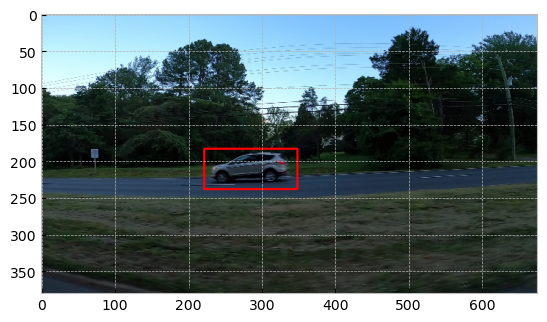

In [10]:
# Example of object visualization using opencv rectangle function
idx=N-1
x= image

plt.imshow(x)
cv2.rectangle(x, (t_train[idx,0], t_train[idx,1]), 
              (t_train[idx,2], t_train[idx,3]), 
              (255, 0, 0), 2);

---

# Assignment

1. Train an artificial neural network for **flower species classification** using the training set of dataset 1.

    * Experiment with several hyperparameters of the network.
    
    * You are welcome to use any architecture or approach you wish.
    
    * Report performance results in training and validation sets.
    
    * Display the learning curves.

---

2. Train an artificial neural network for **object detection** using the training set of dataset 2.

    * Experiment with several hyperparameters of the network.
    
    * You are welcome to use any architecture or approach you wish.
    
    * Report performance results in training and validation sets.
    
    * Display the learning curves.

---

### Test Function

For the test notebook, you will report performance in the test set for both dataset 1 and dataset 2.

* For dataset 1 (flower species dataset), report quantitative metrics.

* For dataset 2 (object detection), include qualitative measures with bounding box visualizations as well as your quantitative approach of choice (required for eel5934 only).

Your test Notebook should include:

1. Loading trained models from problems 1 and 3.

    * If the models are too big (which is to be expect especially if you are using transfer learning), upload the models' weights to a cloud service. Share the link in your readme.md file.
    
2. Make predictions to the respective test sets.

3. Include any necessary visualizations to include in the report.

---

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

---